In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

%cd /content/drive/My\ Drive/Colab Notebooks

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [ ]:
train_df = pd.read_csv('covid_train.csv')
test_df = pd.read_csv('covid_test.csv')

In [ ]:
train_df.head()

,age,dyspnea,NLR,LMR,CD8,Th.Ts,CD45,LDH,CK,Myo,D.Dimer,class,death,survival,predclass
0,76,1,19.187500,1.157994,11.49,2.09,67.12,483,115.0,28.0,0.62,0,0.990,0.010,death
1,68,1,10.789474,3.050739,104.27,0.44,321.51,488,152.7,48.9,9.79,0,0.982,0.018,death
2,77,1,8.626667,1.655191,31.16,2.01,131.60,709,153.4,354.0,0.63,0,1.000,0.000,death
3,71,1,23.962264,1.069929,64.08,3.62,653.26,573,64.5,47.5,5.14,0,0.994,0.006,death
4,80,1,5.466667,1.710311,59.27,1.15,360.08,342,411.0,189.0,0.95,0,0.998,0.002,death


In [ ]:
print('\nNull Values in Training \n{}'.format(train_df.isna().sum()))
print('\nNull Values in Testing \n{}'.format(test_df.isna().sum()))

print('\nDuplicated values in train {}'.format(train_df.duplicated().sum()))
print('Duplicated values in test {}'.format(test_df.duplicated().sum()))

In [ ]:
train_df.dtypes

In [ ]:
train_df['class'] = [0 if 'death' in i else 1 for i in train_df['class']]
test_df['class'] = [0 if 'death' in i else 1 for i in train_df['class']]

,age,dyspnea,NLR,LMR,CD8,Th.Ts,CD45,LDH,CK,Myo,D.Dimer,class
0,76,1,19.187500,1.157994,11.49,2.09,67.12,483,115.0,28.0,0.62,0
1,68,1,10.789474,3.050739,104.27,0.44,321.51,488,152.7,48.9,9.79,0
2,77,1,8.626667,1.655191,31.16,2.01,131.60,709,153.4,354.0,0.63,0
3,71,1,23.962264,1.069929,64.08,3.62,653.26,573,64.5,47.5,5.14,0
4,80,1,5.466667,1.710311,59.27,1.15,360.08,342,411.0,189.0,0.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...
161,68,1,8.117647,1.686977,118.53,1.74,529.78,233,59.0,27.2,1.07,1
162,56,1,4.474576,5.336952,194.01,0.41,474.70,272,174.4,27.2,0.09,1
163,55,1,2.652778,2.033898,93.29,1.01,361.53,441,116.0,29.1,2.09,1
164,51,1,5.466667,1.904762,146.88,0.66,418.70,206,35.3,29.5,0.50,1


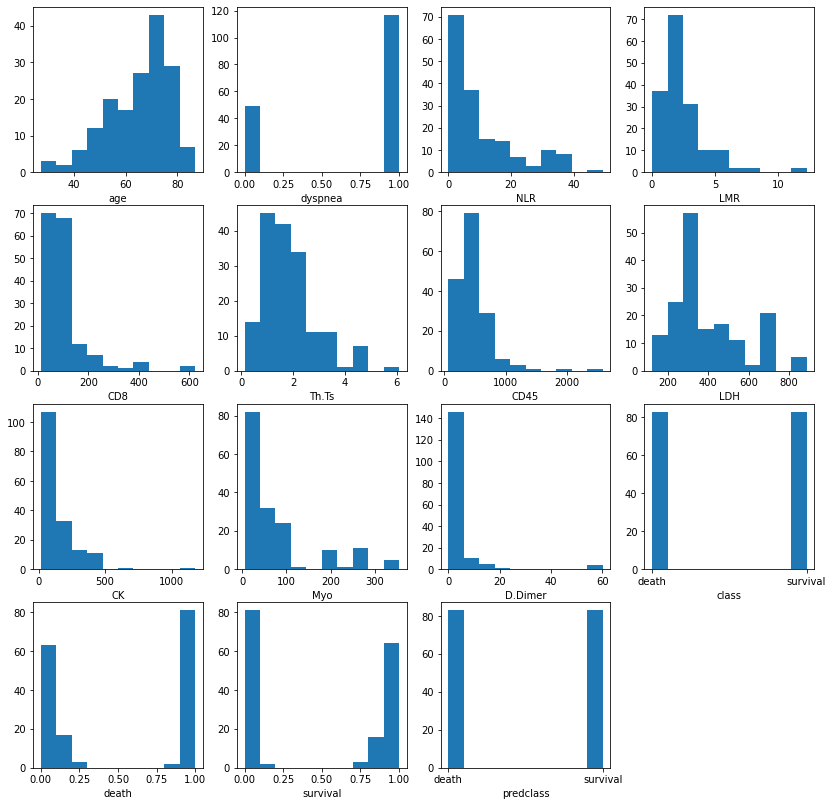

In [ ]:
figure, axis = plt.subplots(4, 4, figsize=(14,14))

for i,col in enumerate(train_df.columns):
  ax = axis[i//4,i%4]
  ax.hist(train_df[col])
  ax.set_xlabel(col)
axis[3,3].set_axis_off()

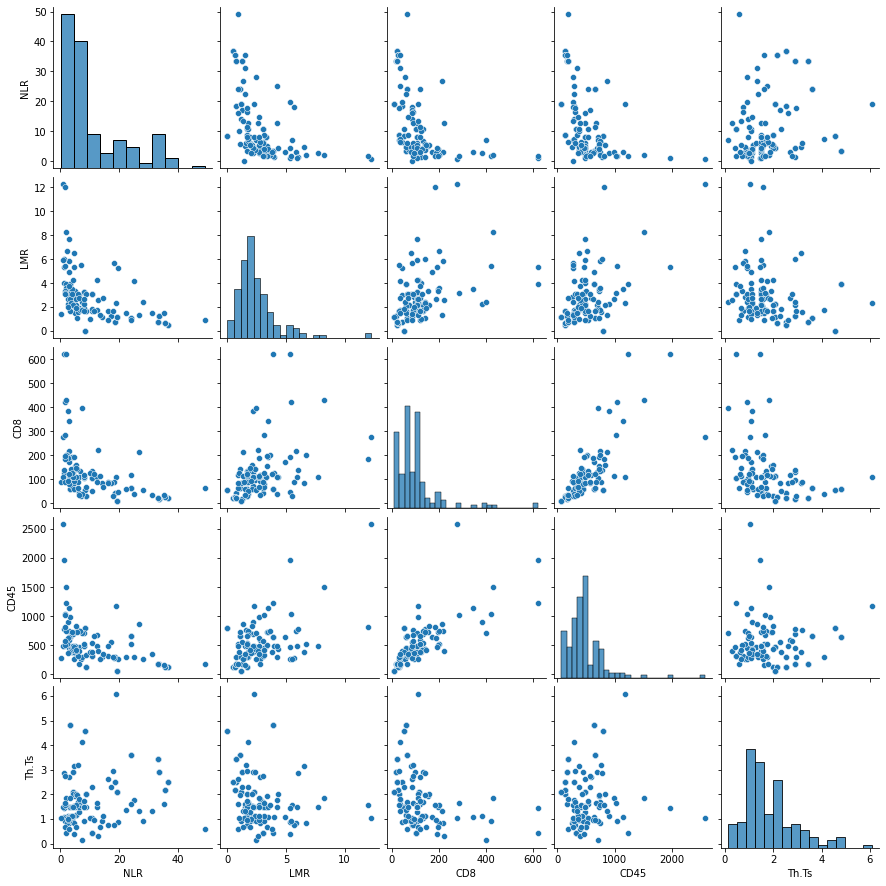

In [ ]:
sns.pairplot(train_df,
             vars=['NLR','LMR',
                   'CD8','CD45','Th.Ts'])

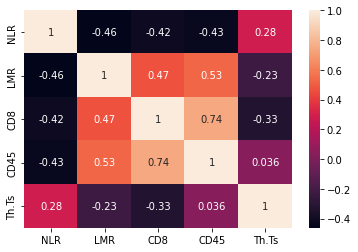

In [ ]:
train_df_corr = train_df[['NLR','LMR','CD8','CD45','Th.Ts']].corr()
sns.heatmap(train_df_corr, annot=True)

In [ ]:
y = train_df['class']
X = train_df.drop(['class','death','survival','predclass'], axis=1)
#X.head()
y_test = test_df['class']
X_test = test_df.drop(['class','death','survival','predclass'], axis=1)

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [ ]:
test_df.head()

,age,dyspnea,NLR,LMR,CD8,Th.Ts,CD45,LDH,CK,Myo,D.Dimer,class,death,survival,predclass
0,62,1,35.571429,0.673077,25.38,2.17,126.81,337,18.0,20.0,0.50,death,0.956,0.044,death
1,70,1,8.187500,3.293808,109.32,1.50,483.72,566,380.0,55.8,0.46,death,0.978,0.022,death
2,72,1,18.500000,0.748669,45.47,2.51,293.17,344,50.4,22.6,0.22,death,0.898,0.102,death
3,53,0,3.270270,3.915344,59.73,4.80,636.17,827,98.0,70.0,17.80,death,0.978,0.022,death
4,77,1,8.626667,1.655191,31.16,2.01,131.60,709,153.4,354.0,0.63,death,1.000,0.000,death


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20)
X_test = test_df[]

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 150, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [8,13]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf_Model = RandomForestClassifier()

In [ ]:
rf_Grid = GridSearchCV(estimator = rf_Model,
                       param_grid = param_grid, 
                       cv = 10,scoring ='roc_auc', 
                       verbose=2, 
                       n_jobs = 4)
rf_Grid.fit(X_train, y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [8, 13],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 25, 41, 56, 72, 87, 103, 118, 134,
                                          150]},
             scoring='roc_auc', verbose=2)

In [ ]:
#print (f'roc/auc: {rf_Grid.score(y_train,rf_Model_best.predict(X_train)):.3f}')

In [ ]:
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 25}

In [ ]:
rf_Model_best = rf_Grid.best_estimator_
prediction = rf_Model_best.predict(X_test)
#roc_auc_score(y, clf.decision_function(X))

In [ ]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y_test

0        death
1        death
2        death
3        death
4        death
5        death
6        death
7        death
8        death
9        death
10       death
11       death
12       death
13       death
14       death
15       death
16       death
17       death
18       death
19       death
20    survival
21    survival
22    survival
23    survival
24    survival
25    survival
26    survival
27    survival
28    survival
29    survival
30    survival
31    survival
32    survival
33    survival
34    survival
35    survival
36    survival
37    survival
38    survival
39    survival
Name: class, dtype: object